In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def show_img(titulo, image):
    cv2.imshow(titulo, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Histogramas
Um histograma representa a distribuição de intensidades de pixel (seja colorido ou em tons de cinza) em uma imagem. 
Ele pode ser visualizado como um gráfico (ou gráfico) que fornece uma intuição de alto nível da distribuição de intensidade (valor de pixel).
Vamos assumir um espaço de cores RGB neste exemplo, então esses valores de pixel estarão no intervalo de 0 a 255.

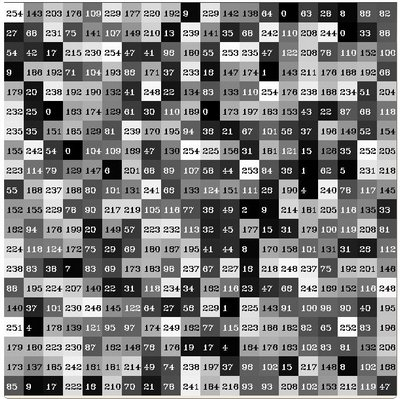

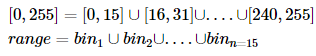

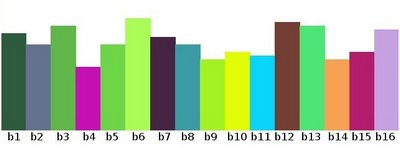

In [4]:
# processo padrão de ler a imagem e criar um canva vazio
img = cv2.imread('assets/fotos/cats.jpg')
# img = cv2.imread('../assets/fotos/cat.jpg')
show_img('gatitos da asimov', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

In [5]:
# primeiro, vamos calcular o histograma da imagem em cinza

# converter a imagem para P&B
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img('gatitos da asimov', cinza)

In [6]:
# Histograma de P&B
# cv2.calcHist(imagem, canais_de_cor(RGB, BGR), mascara, tamanho_do_hist, ranges)
cinza_hist = cv2.calcHist([cinza], [0], None, [256], [0, 256])

# plotando a imagem desse nosso histograma básico das escalas de cinza

Ao plotar essa figura, podemos observar que temos uma grande concentração de
valores próximos de zero, afinal estamos observando uma imagem P&B, onde o
0 representa valores completamente escuros e 255 valores brancos

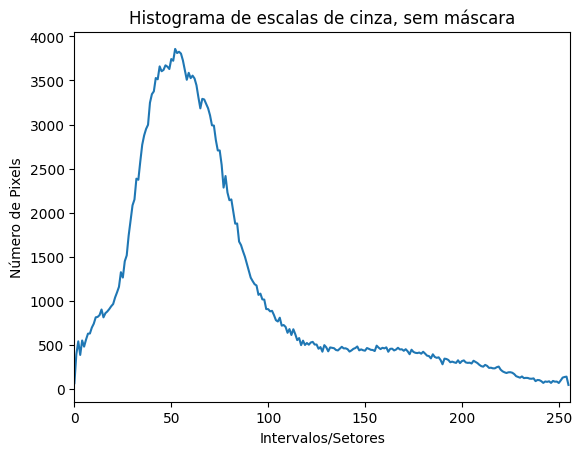

In [7]:
plt.figure()
plt.title('Histograma de escalas de cinza, sem máscara')
plt.xlabel('Intervalos/Setores')
plt.ylabel('Número de Pixels')
plt.plot(cinza_hist)
plt.xlim([0,256])
plt.show()

In [8]:
# vamos rever a imagem na próxima célula para ter uma melhor compreensão
show_img('gatitos da asimov', cinza)

Neste caso, como voltamos a imagem original (não a preto e branco), podemos analisar canais diferentes além do preto ao branco, os canais RGB (lidos pelo cv2 como BGR).
Para isso, iteraremos pelos canais, traçando novas linhas em nosso gráfico.

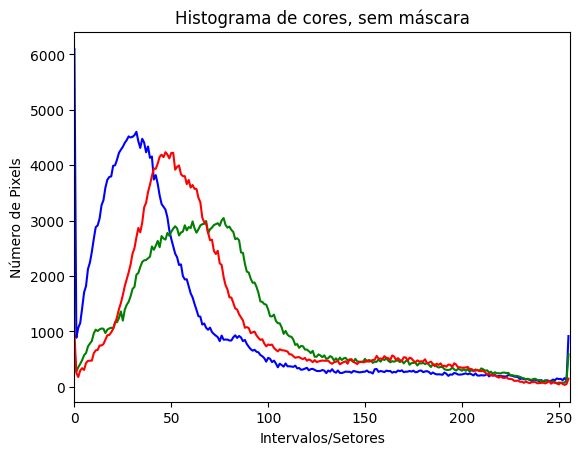

In [9]:
plt.figure()
plt.title('Histograma de cores, sem máscara')
plt.xlabel('Intervalos/Setores')
plt.ylabel('Número de Pixels')
colors = ['b', 'g', 'r']
for channel, cor in enumerate(colors):
    hist = cv2.calcHist([img], [channel], None, [256], [0,256])
    plt.plot(hist, color=cor)
    plt.xlim([0,256])

plt.show()

Se quisermos, podemos analisar trechos específicos de cada imagem, aplicando apenas uma máscara na imagem e traçando o histograma (para plotar é o mesmo código, porém com a adição da máscara)

In [10]:
mask = cv2.circle(blank, (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)
show_img('Mascara', mask)

masked = cv2.bitwise_and(img, img, mask=mask)
show_img('Mascara na imagem', masked)

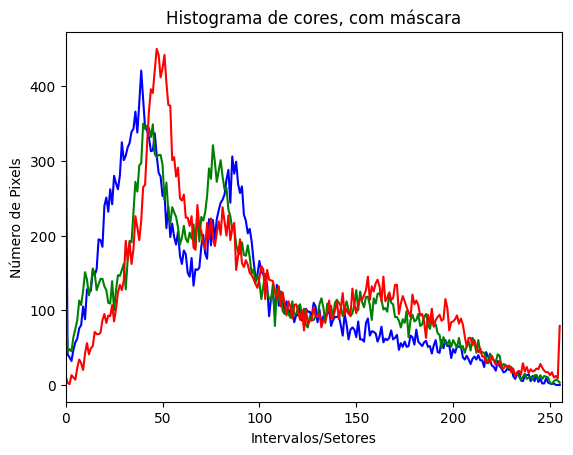

In [12]:
plt.figure()
plt.title('Histograma de cores, com máscara')
plt.xlabel('Intervalos/Setores')
plt.ylabel('Número de Pixels')
colors = ['b', 'g', 'r']
for channel, cor in enumerate(colors):
    hist = cv2.calcHist([img], [channel], mask, [256], [0,256])
    plt.plot(hist, color=cor)
    plt.xlim([0,256])

plt.show()